In [ ]:
#downloading and extracting the dataset on colab's server
import urllib.request
urllib.request.urlretrieve ("https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz","a.tar.gz")
import tarfile
tar = tarfile.open("a.tar.gz")
tar.extractall()
tar.close()

In [10]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [0]:
#forming a panda dataframe from the metadata file
data=pd.read_csv("UrbanSound8K/metadata/UrbanSound8K.csv")

In [0]:
#head of the dataframe
data.head()

In [0]:
#count of datapoints in each of the folders
data["fold"].value_counts()

In [11]:
from librosa import display
import librosa

/home/etvbl072/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/home/etvbl072/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [0]:
#feature set
y,sr=librosa.load("UrbanSound8K/audio/fold5/100263-2-0-137.wav")
mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000).T,axis=0)
chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40).T,axis=0)
chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=40).T,axis=0)
chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=40).T,axis=0)
melspectrogram.shape,chroma_stft.shape,chroma_cq.shape,chroma_cens.shape,mfccs.shape

In [0]:
#stacking and reshaping
features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(40,5))
features.shape

In [0]:
#don't run this
x_train=[]
x_test=[]
y_train=[]
y_test=[]
path="UrbanSound8K/audio/fold"
for i in tqdm(range(len(data))):
    fold_no=str(data.iloc[i]["fold"])
    file=data.iloc[i]["slice_file_name"]
    label=data.iloc[i]["classID"]
    filename=path+fold_no+"/"+file
    y,sr=librosa.load(filename)
    mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
    melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000).T,axis=0)
    chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40).T,axis=0)
    chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=40).T,axis=0)
    chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=40).T,axis=0)
    features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(40,5))
    if(fold_no!='10'):
      x_train.append(features)
      y_train.append(label)
    else:
      x_test.append(features)
      y_test.append(label)

In [0]:
#don't run
len(x_train)+len(x_test)

In [0]:
#don't run 
len(data)

In [0]:
#converting the lists into numpy arrays
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

In [0]:
#reshaping into 2d to save in csv format
x_train_2d=np.reshape(x_train,(x_train.shape[0],x_train.shape[1]*x_train.shape[2]))
x_test_2d=np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
x_train_2d.shape,x_test_2d.shape

In [0]:
#saving the data numpy arrays
#start from here to train the model
np.savetxt("train_data.csv", x_train_2d, delimiter=",")
np.savetxt("test_data.csv",x_test_2d,delimiter=",")
np.savetxt("train_labels.csv",y_train,delimiter=",")
np.savetxt("test_labels.csv",y_test,delimiter=",")

In [12]:
import numpy as np

In [0]:
from numpy import genfromtxt
x_train = genfromtxt('train_data.csv', delimiter=',')
y_train = genfromtxt('train_labels.csv', delimiter=',')
x_test = genfromtxt('test_data.csv', delimiter=',')
y_test = genfromtxt('test_labels.csv', delimiter=',')

In [0]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

NameError: ignored

In [0]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_train.shape,y_test.shape

Using TensorFlow backend.


NameError: ignored

In [0]:
#reshaping to 2D 
x_train=np.reshape(x_train,(x_train.shape[0], 40,5))
x_test=np.reshape(x_test,(x_test.shape[0], 40,5))
x_train.shape,x_test.shape

NameError: ignored

In [0]:
#reshaping to shape required by CNN
x_train=np.reshape(x_train,(x_train.shape[0], 40,5,1))
x_test=np.reshape(x_test,(x_test.shape[0], 40,5,1))

NameError: ignored

In [0]:
#shapes
x_train.shape,x_test.shape

NameError: ignored

In [13]:
#start from here to run the model without training
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

Using Theano backend.
/home/etvbl072/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/etvbl072/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/etvbl072/anaconda3/envs/tensorflow_env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16,

In [14]:
#forming model
model=Sequential()

In [15]:
#adding layers and forming the model
model.add(Conv2D(64,kernel_size=5,strides=1,padding="Same",activation="relu",input_shape=(40,5,1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(10,activation="softmax"))

In [16]:
!apt install graphviz
!pip install pydot pydot-ng
!echo "Double check with Python 3"
!python -c "import pydot"

# Restart runtime to allow Jupyter to know the changes above
import os

from keras.models import Model
from keras.layers import Input, Dense
from keras.utils import plot_model


# Plot model graph
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
Double check with Python 3


ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 40, 5, 64)         1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 3, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 3, 128)        204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 2, 128)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 2, 128)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2560)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)              

In [20]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [0]:
#dont run this
#code to train
history = model.fit(x_train,y_train,batch_size=64,epochs=60,validation_data=(x_test,y_test))

Train on 7895 samples, validate on 837 samples
Epoch 1/60
7895/7895 [==============================] - 3s 426us/step - loss: 2.0825 - acc: 0.2747 - val_loss: 1.6821 - val_acc: 0.4313
Epoch 2/60
7895/7895 [==============================] - 2s 242us/step - loss: 1.4716 - acc: 0.4849 - val_loss: 1.3417 - val_acc: 0.5412
Epoch 3/60
7895/7895 [==============================] - 2s 240us/step - loss: 1.1646 - acc: 0.6046 - val_loss: 1.2911 - val_acc: 0.5305
Epoch 4/60
7895/7895 [==============================] - 2s 239us/step - loss: 0.9611 - acc: 0.6765 - val_loss: 1.1130 - val_acc: 0.6201
Epoch 5/60
7895/7895 [==============================] - 2s 239us/step - loss: 0.8559 - acc: 0.7075 - val_loss: 1.0465 - val_acc: 0.6535
Epoch 6/60
7895/7895 [==============================] - 2s 239us/step - loss: 0.7380 - acc: 0.7569 - val_loss: 1.1566 - val_acc: 0.6583
Epoch 7/60
7895/7895 [==============================] - 2s 241us/step - loss: 0.6965 - acc: 0.7711 - val_loss: 0.9827 - val_acc: 0.6930
E

In [0]:
#importatnt run this
model.load_weights("audio.h5")

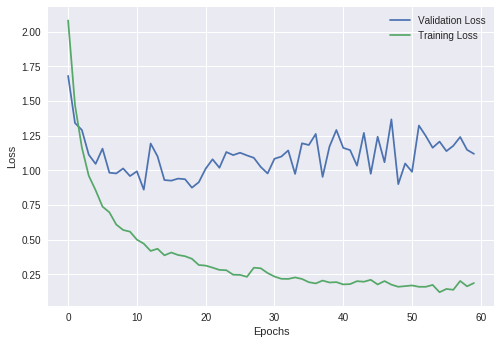

In [0]:
#dont run from here
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Validation Loss', 'Training Loss'])
plt.show()

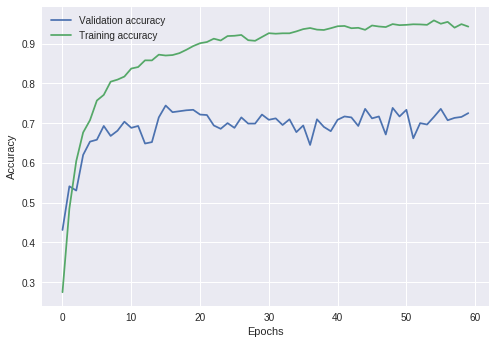

In [0]:
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Validation accuracy', 'Training accuracy'])
plt.show()

In [0]:
from sklearn.metrics import confusion_matrix as cm

In [0]:
cm(np.argmax(y_train, axis = 1),np.argmax(model.predict(x_train), axis = 1))

array([[899,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0, 396,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 880,   4,   0,   1,   1,   0,   4,  10],
       [  1,   1,   3, 887,   0,   5,   2,   0,   0,   1],
       [  1,   0,   0,   0, 877,   0,   0,  22,   0,   0],
       [  0,   0,   0,   0,   0, 907,   0,   0,   0,   0],
       [  0,   0,   0,   1,   0,   0, 341,   0,   0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 902,   0,   0],
       [  0,   0,   0,   5,   0,   1,   0,   0, 840,   0],
       [  1,   0,   2,   1,   0,   3,   0,   3,   0, 890]])

In [0]:
cm(np.argmax(y_test, axis = 1),np.argmax(model.predict(x_test), axis = 1))

array([[69,  0,  2,  0,  3,  3,  0, 12,  0, 11],
       [ 2, 25,  0,  0,  0,  2,  0,  1,  1,  2],
       [ 0,  1, 76, 13,  0,  2,  0,  0,  5,  3],
       [ 0,  1,  7, 81,  2,  3,  0,  0,  0,  6],
       [13,  1,  0,  5, 58,  1,  0, 21,  1,  0],
       [ 6,  0,  5, 14,  0, 57,  0,  8,  0,  3],
       [ 0,  0,  1,  1,  0,  0, 30,  0,  0,  0],
       [ 4,  0,  0,  1,  2,  2,  1, 86,  0,  0],
       [ 0,  3, 18, 11,  0,  2,  0,  0, 47,  2],
       [ 4,  4,  6,  1,  3,  1,  0,  1,  2, 78]])

In [0]:
"""
0 = air_conditioner
1 = car_horn
2 = children_playing
3 = dog_bark
4 = drilling
5 = engine_idling
6 = gun_shot
7 = jackhammer
8 = siren
9 = street_music"""

'\n0 = air_conditioner\n1 = car_horn\n2 = children_playing\n3 = dog_bark\n4 = drilling\n5 = engine_idling\n6 = gun_shot\n7 = jackhammer\n8 = siren\n9 = street_music'

In [0]:
#continue from here
i = 235

path="UrbanSound8K/audio/fold"
fold_no=str(data.iloc[i]["fold"])
file=data.iloc[i]["slice_file_name"]
label=data.iloc[i]["classID"]
filename=path+fold_no+"/"+file
y,sr=librosa.load(filename)
mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=40).T,axis=0)
melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40,fmax=8000).T,axis=0)
chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=40).T,axis=0)
chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=40).T,axis=0)
chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=40).T,axis=0)
features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(40,5))

In [0]:
from IPython.display import Audio
Audio(y, rate=20000)

In [0]:
print("Actual Label")
print(label)
print("Predicted Label")
print(np.argmax(model.predict(features.reshape((1,40,5,1))),axis =1))

Actual Label
5
Predicted Label
[5]
